## Analyze and predict US Covid-19 Deaths(dependent variable) using the number of Cases as the independent variable.


The first generic step involve in a data science project is the **ETL**. <br/>
ETL, a data integration process that is Extract, Transform and Load, these are three distinct processes but are interrelated.<br/>

## ETL
### **Extract** <br/>
   1. Cloned the data from data source link or repository.<br/>
   2. Access the data what files type it contain.<br/>
   3. Read the data into spark dataframe.<br/>
    
### **Transform**<br/>
   1. Use statistical measures like min, max, mean, standard deviation to see how values are distributed in the data.<br/>
   2. Identify columns with potential data quality for modeling.<br/>
   3. Handle columns with wrong data values in each row.<br/>
   4. Apply a method to calculate the right values of the rows in the columns identified for modeling.<br/>
   5. Split and match data types of columns.<br/>
   6. Copy values into new columns for visualization and feature engineering.<br/>
   7. Scalling, converting and modify features

### **Load**<br/>
   1. Save the transform data to a database or data warehouse but in this project, the data is loaded into a pdf file and<br/>
   2. Pushed to github repository.<br/><br/>



The data was extracted from https://github.com/nytimes/covid-19-data, it is updated in real-time. <br/>
The New York Times release a series of data files with cumulative counts of coronavirus cases and deaths in the United States, <br/>
at the state and county level, over time. The scope of this project is concentrated on the daily number of cases and deaths nationwide, <br/>
including states, U.S. territories and the District of Columbia, the required csv file for the analyzes is us.csv.<br/>


## ETL ## - Extrat Transform Load

In [1]:
#from IPython.display import Markdown, display
#def printmd(string):
   # display(Markdown('# <span style="color:red">'+string+'</span>'))


#if ('sc' in locals() or 'sc' in globals()):
 #   printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

Let's install pyspark with pip package management system.

In [1]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8 MB 12 kB/s s eta 0:00:01 75.8 MB 78.1 MB/s eta 0:00:02��▍               | 111.6 MB 78.1 MB/s eta 0:00:02�██████████▍        | 159.2 MB 75.8 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 64.9 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=47f963a30f34e88687d5fc9d0d8f2513738d1df8c78b2243e489f8ad1905ddb4
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/01/c0/03/1c241c9c482b647d4d99412a98a5c7f87472728ad41ae55e1e
Successfully built pyspark


Start spark session

In [2]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [3]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

Clone the data from the source repository.

In [4]:
!git clone https://github.com/nytimes/covid-19-data.git

Cloning into 'covid-19-data'...
remote: Enumerating objects: 9336, done.
remote: Total 9336 (delta 0), reused 0 (delta 0), pack-reused 9336
Receiving objects: 100% (9336/9336), 447.86 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (5790/5790), done.


List the directory contents of our data.

In [5]:
!ls covid-19-data

colleges       mask-use			       us-counties.csv
excess-deaths  NEW-YORK-DEATHS-METHODOLOGY.md  us.csv
LICENSE        PROBABLE-CASES-NOTE.md	       us-states.csv
live	       README.md


Return the list containing names of th entries in the directory.

In [6]:
import os

file_list = os.listdir('covid-19-data')
file_list

['live',
 'mask-use',
 'README.md',
 '.git',
 'us-states.csv',
 'us-counties.csv',
 'PROBABLE-CASES-NOTE.md',
 '.github',
 'NEW-YORK-DEATHS-METHODOLOGY.md',
 'LICENSE',
 'excess-deaths',
 '.gitignore',
 'us.csv',
 'colleges']

Remove unwanted content in the list

In [7]:
new_list = []
for i in file_list:
    if i not in ('.git', '.gitignore', '.github'):
        new_list.append(i)
file_list = new_list
file_list

['live',
 'mask-use',
 'README.md',
 'us-states.csv',
 'us-counties.csv',
 'PROBABLE-CASES-NOTE.md',
 'NEW-YORK-DEATHS-METHODOLOGY.md',
 'LICENSE',
 'excess-deaths',
 'us.csv',
 'colleges']

Let's define a schema for our data framework.

In [8]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

schema = StructType([
  StructField("date", StringType(), True),
  StructField("cases", IntegerType(), True),
  StructField("deaths", IntegerType(), True)
])

Read the csv file into spark dataframe.

In [9]:
dfs = spark.read.csv('covid-19-data/us.csv', header=True, schema=schema)
dfs.show()

+----------+-----+------+
|      date|cases|deaths|
+----------+-----+------+
|2020-01-21|    1|     0|
|2020-01-22|    1|     0|
|2020-01-23|    1|     0|
|2020-01-24|    2|     0|
|2020-01-25|    3|     0|
|2020-01-26|    5|     0|
|2020-01-27|    5|     0|
|2020-01-28|    5|     0|
|2020-01-29|    5|     0|
|2020-01-30|    6|     0|
|2020-01-31|    7|     0|
|2020-02-01|    8|     0|
|2020-02-02|   11|     0|
|2020-02-03|   11|     0|
|2020-02-04|   11|     0|
|2020-02-05|   12|     0|
|2020-02-06|   12|     0|
|2020-02-07|   12|     0|
|2020-02-08|   12|     0|
|2020-02-09|   12|     0|
+----------+-----+------+
only showing top 20 rows



Print the schema

In [10]:
dfs.printSchema()

root
 |-- date: string (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)



Describe the desired columns of our interest to see the summary of the statistical measures.

In [11]:
dfs.describe('cases', 'deaths').show()

+-------+-----------------+------------------+
|summary|            cases|            deaths|
+-------+-----------------+------------------+
|  count|              379|               379|
|   mean|6622884.292875989|157042.61213720316|
| stddev| 7260045.81581069|120759.33425610952|
|    min|                1|                 0|
|    max|         26472780|            446641|
+-------+-----------------+------------------+



Peasrson correlation to measure the strength of the linear relationship between the two varialbles, cases and deaths.

In [12]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assemblercorr = VectorAssembler(inputCols=['cases', 'deaths'], outputCol=vector_col)
df_vector = assemblercorr.transform(dfs).select(vector_col)

# get correlation matrix
cor = Correlation.corr(df_vector, vector_col)
cor.show()

+----------------------+
|pearson(corr_features)|
+----------------------+
|  1.0              ...|
+----------------------+



Split function to split the date column into three new columns.

In [13]:
from pyspark.sql.functions import split

dfs1 = dfs.withColumn('year', split(dfs['date'], '-').getItem(0)).withColumn(
    'month', split(dfs['date'], '-').getItem(1)).withColumn('day', split(dfs['date'], '-').getItem(2))
dfs1.show()


+----------+-----+------+----+-----+---+
|      date|cases|deaths|year|month|day|
+----------+-----+------+----+-----+---+
|2020-01-21|    1|     0|2020|   01| 21|
|2020-01-22|    1|     0|2020|   01| 22|
|2020-01-23|    1|     0|2020|   01| 23|
|2020-01-24|    2|     0|2020|   01| 24|
|2020-01-25|    3|     0|2020|   01| 25|
|2020-01-26|    5|     0|2020|   01| 26|
|2020-01-27|    5|     0|2020|   01| 27|
|2020-01-28|    5|     0|2020|   01| 28|
|2020-01-29|    5|     0|2020|   01| 29|
|2020-01-30|    6|     0|2020|   01| 30|
|2020-01-31|    7|     0|2020|   01| 31|
|2020-02-01|    8|     0|2020|   02| 01|
|2020-02-02|   11|     0|2020|   02| 02|
|2020-02-03|   11|     0|2020|   02| 03|
|2020-02-04|   11|     0|2020|   02| 04|
|2020-02-05|   12|     0|2020|   02| 05|
|2020-02-06|   12|     0|2020|   02| 06|
|2020-02-07|   12|     0|2020|   02| 07|
|2020-02-08|   12|     0|2020|   02| 08|
|2020-02-09|   12|     0|2020|   02| 09|
+----------+-----+------+----+-----+---+
only showing top

We join year and month columns

In [14]:
from pyspark.sql.functions import concat, col, lit

dfs2 = dfs1.withColumn("yearmonth",concat(col("year"),lit('-'),col("month")))
dfs2.show()   

+----------+-----+------+----+-----+---+---------+
|      date|cases|deaths|year|month|day|yearmonth|
+----------+-----+------+----+-----+---+---------+
|2020-01-21|    1|     0|2020|   01| 21|  2020-01|
|2020-01-22|    1|     0|2020|   01| 22|  2020-01|
|2020-01-23|    1|     0|2020|   01| 23|  2020-01|
|2020-01-24|    2|     0|2020|   01| 24|  2020-01|
|2020-01-25|    3|     0|2020|   01| 25|  2020-01|
|2020-01-26|    5|     0|2020|   01| 26|  2020-01|
|2020-01-27|    5|     0|2020|   01| 27|  2020-01|
|2020-01-28|    5|     0|2020|   01| 28|  2020-01|
|2020-01-29|    5|     0|2020|   01| 29|  2020-01|
|2020-01-30|    6|     0|2020|   01| 30|  2020-01|
|2020-01-31|    7|     0|2020|   01| 31|  2020-01|
|2020-02-01|    8|     0|2020|   02| 01|  2020-02|
|2020-02-02|   11|     0|2020|   02| 02|  2020-02|
|2020-02-03|   11|     0|2020|   02| 03|  2020-02|
|2020-02-04|   11|     0|2020|   02| 04|  2020-02|
|2020-02-05|   12|     0|2020|   02| 05|  2020-02|
|2020-02-06|   12|     0|2020| 

This part is important for further transformation and modeling. We need the right statistical values <br/>for both **cases** and **deaths** defined in columns - dailycases and dailydeaths, you will see in various dataframes <br/>through this analysis. The csv file from our data source does not contain the actual correct values of the daily cases and deaths. <br/>This is an observation that need to be resolve for future engineering and model training and evaluation so we have <br/>to find the actual daily cases and deaths from the cases and deaths columns in our dataframe by substracting <br/>the previous row value in each column from the next row entry and replace the value of the next row entry with the **difference** <br/>which is the correct actual value for that specific row.

We begin with the **dailycases** as defined in the columns in the dataframe.

In [15]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F
from pyspark.sql.functions import col


window = Window().orderBy("year")
dfs_daily_cases = dfs2.withColumn("dailycases", F.col("cases") - F.lag(F.col("cases"), 1, 0).over(window))
dfs_daily_cases.show()

+----------+-----+------+----+-----+---+---------+----------+
|      date|cases|deaths|year|month|day|yearmonth|dailycases|
+----------+-----+------+----+-----+---+---------+----------+
|2020-01-21|    1|     0|2020|   01| 21|  2020-01|         1|
|2020-01-22|    1|     0|2020|   01| 22|  2020-01|         0|
|2020-01-23|    1|     0|2020|   01| 23|  2020-01|         0|
|2020-01-24|    2|     0|2020|   01| 24|  2020-01|         1|
|2020-01-25|    3|     0|2020|   01| 25|  2020-01|         1|
|2020-01-26|    5|     0|2020|   01| 26|  2020-01|         2|
|2020-01-27|    5|     0|2020|   01| 27|  2020-01|         0|
|2020-01-28|    5|     0|2020|   01| 28|  2020-01|         0|
|2020-01-29|    5|     0|2020|   01| 29|  2020-01|         0|
|2020-01-30|    6|     0|2020|   01| 30|  2020-01|         1|
|2020-01-31|    7|     0|2020|   01| 31|  2020-01|         1|
|2020-02-01|    8|     0|2020|   02| 01|  2020-02|         1|
|2020-02-02|   11|     0|2020|   02| 02|  2020-02|         3|
|2020-02

Computing the correct daily deaths in column **dailydeaths** from column deaths in out dataframe.

In [16]:
dfs_daily_deaths = dfs_daily_cases.withColumn("dailydeaths", F.col("deaths") - F.lag(F.col("deaths"), 1, 0).over(window))
dfs_daily_deaths.show()



+----------+-----+------+----+-----+---+---------+----------+-----------+
|      date|cases|deaths|year|month|day|yearmonth|dailycases|dailydeaths|
+----------+-----+------+----+-----+---+---------+----------+-----------+
|2020-01-21|    1|     0|2020|   01| 21|  2020-01|         1|          0|
|2020-01-22|    1|     0|2020|   01| 22|  2020-01|         0|          0|
|2020-01-23|    1|     0|2020|   01| 23|  2020-01|         0|          0|
|2020-01-24|    2|     0|2020|   01| 24|  2020-01|         1|          0|
|2020-01-25|    3|     0|2020|   01| 25|  2020-01|         1|          0|
|2020-01-26|    5|     0|2020|   01| 26|  2020-01|         2|          0|
|2020-01-27|    5|     0|2020|   01| 27|  2020-01|         0|          0|
|2020-01-28|    5|     0|2020|   01| 28|  2020-01|         0|          0|
|2020-01-29|    5|     0|2020|   01| 29|  2020-01|         0|          0|
|2020-01-30|    6|     0|2020|   01| 30|  2020-01|         1|          0|
|2020-01-31|    7|     0|2020|   01| 3

Let's drop some columns from the dataframe that not needed for now.

In [17]:
dfsdaily_cases_deaths = dfs_daily_deaths.drop("yearmonth","month","day","date")

dfsdaily_cases_deaths.show()



+-----+------+----+----------+-----------+
|cases|deaths|year|dailycases|dailydeaths|
+-----+------+----+----------+-----------+
|    1|     0|2020|         1|          0|
|    1|     0|2020|         0|          0|
|    1|     0|2020|         0|          0|
|    2|     0|2020|         1|          0|
|    3|     0|2020|         1|          0|
|    5|     0|2020|         2|          0|
|    5|     0|2020|         0|          0|
|    5|     0|2020|         0|          0|
|    5|     0|2020|         0|          0|
|    6|     0|2020|         1|          0|
|    7|     0|2020|         1|          0|
|    8|     0|2020|         1|          0|
|   11|     0|2020|         3|          0|
|   11|     0|2020|         0|          0|
|   11|     0|2020|         0|          0|
|   12|     0|2020|         1|          0|
|   12|     0|2020|         0|          0|
|   12|     0|2020|         0|          0|
|   12|     0|2020|         0|          0|
|   12|     0|2020|         0|          0|
+-----+----

Compute the sum total daily covid-19 cases in the United States. Again this values are updated in <br/>real time so anytime you execute each cell the values may change depending on  recent data push notification from the data source repository.

In [18]:
dfs_daily_cases_total = dfsdaily_cases_deaths.agg({'dailycases':'sum'})
dfs_daily_cases_total.show()


+---------------+
|sum(dailycases)|
+---------------+
|       26472780|
+---------------+



Compute the sum total daily covid-19 deaths in the United States from the start of the pandemic.

In [19]:
dfs_daily_deaths_total = dfsdaily_cases_deaths.agg({'dailydeaths':'sum'})
dfs_daily_deaths_total.show()


+----------------+
|sum(dailydeaths)|
+----------------+
|          446641|
+----------------+



Compute the maximum or the highest daily covid-19 cases since the start of the pandemic.

In [20]:
dfs_daily_cases_high = dfsdaily_cases_deaths.agg({'dailycases':'max'})
dfs_daily_cases_high.show()

+---------------+
|max(dailycases)|
+---------------+
|         300594|
+---------------+



Compute the maximum or the highest daily covid-19 deaths since the start of the pandemic.

In [21]:
dfs_daily_deaths_high = dfsdaily_cases_deaths.agg({'dailydeaths':'max'})
dfs_daily_deaths_high.show()

+----------------+
|max(dailydeaths)|
+----------------+
|            4406|
+----------------+



## Data Visualization ##

Let's visualize the daily case and death count of covid-19 in a graphical representaion using seaborn and matplotlib. <br/> This will help users to see and understand trends and pattern in the data. You will be able to determine or derive a meaningful insights from the data during the epandemic years 2020 & 2021.

We start with the **daily case** count.

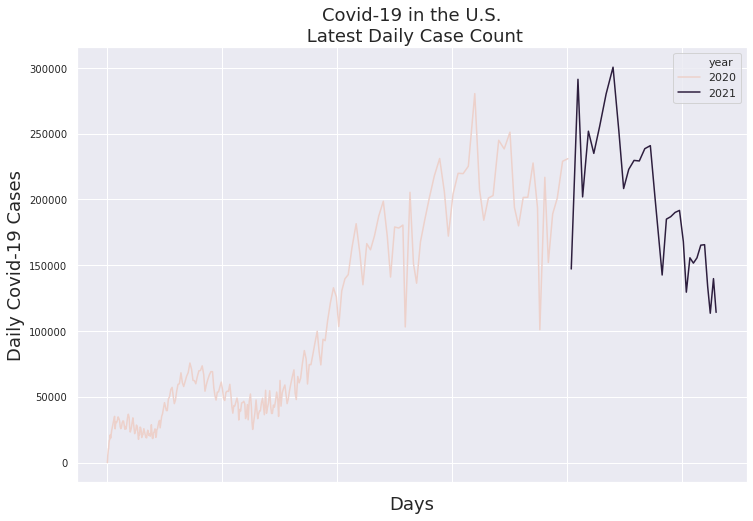

<Figure size 2880x1440 with 0 Axes>

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

daily_cases = sns.lineplot(x="cases", y="dailycases", data=dfsdaily_cases_deaths.toPandas(), hue="year")

sns.set(rc={'figure.figsize':(12,8)})

daily_cases.set(xticklabels=[])

#daily_cases.set(xlabel=None)

plt.ylabel("Daily Covid-19 Cases", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.title("Covid-19 in the U.S.\n Latest Daily Case Count", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.figure(figsize=(40,20))
plt.show()

Visualizing daily covid-19 **deaths** count.

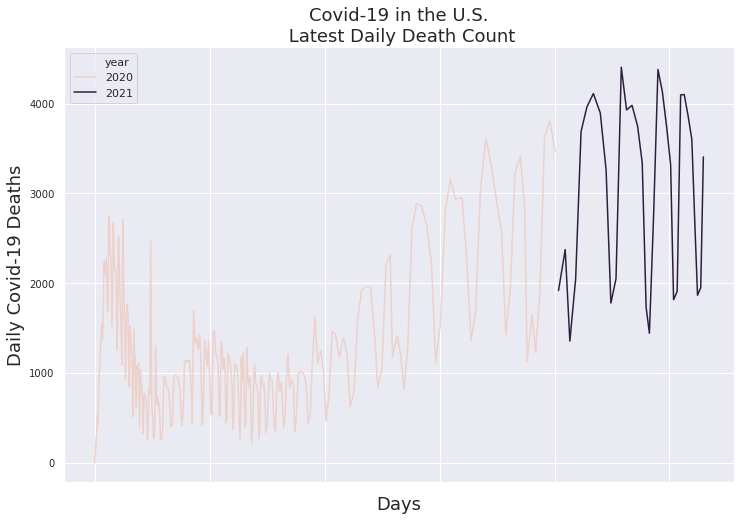

<Figure size 2880x1440 with 0 Axes>

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

daily_deaths = sns.lineplot(x="cases", y="dailydeaths", data=dfsdaily_cases_deaths.toPandas(), hue="year")

sns.set(rc={'figure.figsize':(12,8)})


daily_deaths.set(xticklabels=[])

#daily_cases.set(xlabel=None)

plt.ylabel("Daily Covid-19 Deaths", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.title("Covid-19 in the U.S.\n Latest Daily Death Count", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.figure(figsize=(40,20))
plt.show()

Let's create new columns **maximum cases** and the **maximum deaths** of our data, we compute the maximum values from each month. <br/>This part is relevant in calculating the actual monthly cases and deaths in the next dataframes.

In [25]:
dfsmax = dfs2.groupBy("year","month","yearmonth").max("cases","deaths")
#dfsmax.show()
dfsmax1 = dfsmax.orderBy("max(cases)", "year")
dfsmax2 = dfsmax1.withColumnRenamed("max(cases)","maximumcases").withColumnRenamed("max(deaths)","maximumdeaths")
dfsmax2.show()

+----+-----+---------+------------+-------------+
|year|month|yearmonth|maximumcases|maximumdeaths|
+----+-----+---------+------------+-------------+
|2020|   01|  2020-01|           7|            0|
|2020|   02|  2020-02|          70|            1|
|2020|   03|  2020-03|      188461|         4304|
|2020|   04|  2020-04|     1075756|        63140|
|2020|   05|  2020-05|     1799302|       104379|
|2020|   06|  2020-06|     2653321|       127462|
|2020|   07|  2020-07|     4571669|       153862|
|2020|   08|  2020-08|     6045455|       183472|
|2020|   09|  2020-09|     7262734|       206852|
|2020|   10|  2020-10|     9208964|       230510|
|2020|   11|  2020-11|    13615129|       268023|
|2020|   12|  2020-12|    20026223|       346039|
|2021|   01|  2021-01|    26218775|       441285|
|2021|   02|  2021-02|    26472780|       446641|
+----+-----+---------+------------+-------------+



We find the actual **monthlycases** and **monthlydeaths** from maximumcases and maximumdeaths columns <br/>by applying the same computation from our initial data exploration in dailycases and dailydeaths analysis.

Computing **monthly covid-19 cases**

In [26]:

dfsmonthly_cases = dfsmax2.withColumn("monthlycases", F.col("maximumcases") - F.lag(F.col("maximumcases"), 1, 0).over(window))

dfsmonthly_cases.show()


+----+-----+---------+------------+-------------+------------+
|year|month|yearmonth|maximumcases|maximumdeaths|monthlycases|
+----+-----+---------+------------+-------------+------------+
|2020|   01|  2020-01|           7|            0|           7|
|2020|   02|  2020-02|          70|            1|          63|
|2020|   03|  2020-03|      188461|         4304|      188391|
|2020|   04|  2020-04|     1075756|        63140|      887295|
|2020|   05|  2020-05|     1799302|       104379|      723546|
|2020|   06|  2020-06|     2653321|       127462|      854019|
|2020|   07|  2020-07|     4571669|       153862|     1918348|
|2020|   08|  2020-08|     6045455|       183472|     1473786|
|2020|   09|  2020-09|     7262734|       206852|     1217279|
|2020|   10|  2020-10|     9208964|       230510|     1946230|
|2020|   11|  2020-11|    13615129|       268023|     4406165|
|2020|   12|  2020-12|    20026223|       346039|     6411094|
|2021|   01|  2021-01|    26218775|       441285|     6

Computing **monthly covid-19 deaths**

In [27]:
dfsmonthly_deaths_cases = dfsmonthly_cases.withColumn("monthlydeath", F.col("maximumdeaths") - F.lag(F.col("maximumdeaths"), 1,0).over(window))


dfsmonthly_deaths_cases.show()



+----+-----+---------+------------+-------------+------------+------------+
|year|month|yearmonth|maximumcases|maximumdeaths|monthlycases|monthlydeath|
+----+-----+---------+------------+-------------+------------+------------+
|2020|   01|  2020-01|           7|            0|           7|           0|
|2020|   02|  2020-02|          70|            1|          63|           1|
|2020|   03|  2020-03|      188461|         4304|      188391|        4303|
|2020|   04|  2020-04|     1075756|        63140|      887295|       58836|
|2020|   05|  2020-05|     1799302|       104379|      723546|       41239|
|2020|   06|  2020-06|     2653321|       127462|      854019|       23083|
|2020|   07|  2020-07|     4571669|       153862|     1918348|       26400|
|2020|   08|  2020-08|     6045455|       183472|     1473786|       29610|
|2020|   09|  2020-09|     7262734|       206852|     1217279|       23380|
|2020|   10|  2020-10|     9208964|       230510|     1946230|       23658|
|2020|   11|

Graphical representation of the **monthly covid-19 case** count. You can determine from the barplot <br/>the lowest or the highest monthly cases in the US by year.

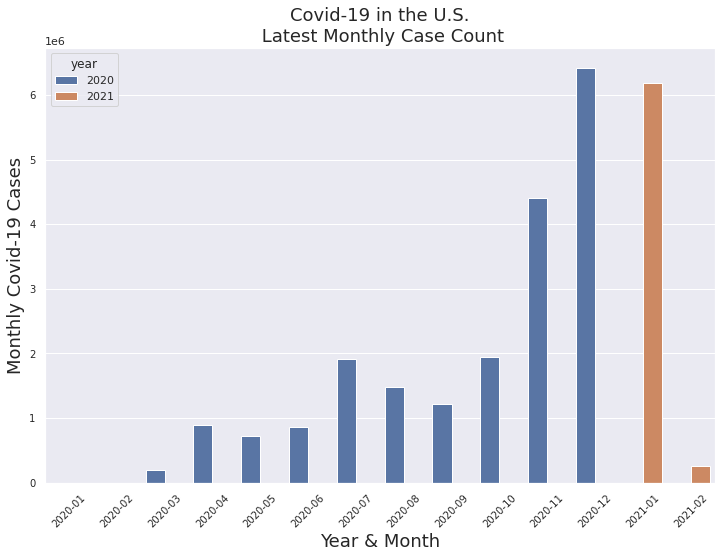

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
#monthly_cases = sns.lineplot(x='yearmonth', y='monthlycases', linewidth = 4, ci=False, hue = 'year', data = dfsmonthly_cases.toPandas())

monthly_cases = sns.barplot(x="yearmonth", y="monthlycases", data=dfsmonthly_deaths_cases.toPandas(), ci=False, hue = 'year')

sns.set(rc={'figure.figsize':(12,8)})

plt.ylabel("Monthly Covid-19 Cases", fontsize = 18)
plt.xlabel("Year & Month", fontsize = 18)
plt.title("Covid-19 in the U.S.\n Latest Monthly Case Count", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
#plt.figure(figsize=(40,20))
plt.show()


Graphical representation of the **monthly covid-19 death** count. The lineplot shows different variations of the death count from every other month.

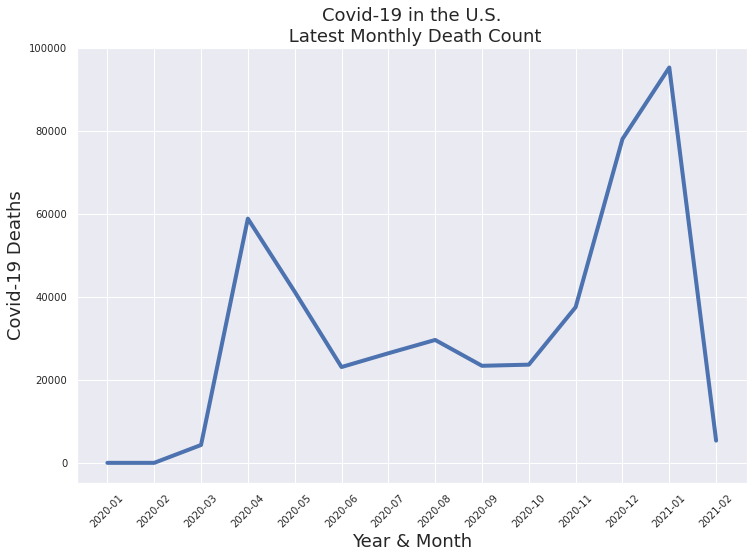

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

monthly_deaths = sns.lineplot(x='yearmonth', y='monthlydeath', linewidth = 4, data = dfsmonthly_deaths_cases.toPandas())

#monthly_deaths = sns.barplot(x="yearmonth", y="monthlydeath", data=dfsmonthly_deaths.toPandas(), ci=False, hue = 'year')

sns.set(rc={'figure.figsize':(12,8)})

plt.ylabel("Covid-19 Deaths", fontsize = 18)
plt.xlabel("Year & Month", fontsize = 18)
plt.title("Covid-19 in the U.S.\n Latest Monthly Death Count", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.show()



## Future Engineering ##

Preparing the data for classification and prediction using machine learning algorithms. <br/>We will use these four conventions in our data preparation, StringIndexer, OneHotEncoder, VectorAssembler and Normalizer.

**StringIndexer** <br/>
encodes a string column of labels, in our project the labels are **dailycases** and **dailydeaths**, <br/>to a column of label indices, **daily_case_index** and **daily_deaths_index**. The indices are in 0, numLabels ordered by label frequencies, <br/>so the most frequent label gets index 0. If the input column is numeric, we cast it to string and index the string values. <br/>When downstream pipeline components such as Encoder or Transformer make use of this string-indexed label, we set the input <br/>column of the component to this string-indexed column name. <br/>

**OneHotEncoder**<br/>
One-hot encoding maps a column of label indices to a column of binary vectors(**daily_case_category_index** and **daily_death_category_index**), with at most a single one-value. <br/>This encoding allows algorithms which expect continuous features, such as regression models, to use categorical features.<br/>

**VectorAssembler**<br/>
VectorAssembler is a transformer that combines a given list of column/s into a single vector column.<br/>In our vector assembler we transform **daily_case_category_index** to single feature vector call **features** in order to train ML models like linear regression, logistic regression and decision trees. <br/>VectorAssembler accepts the<br/> input column types like: all numeric types, boolean type, and vector type. <br/>In each row, the values of the input columns will be concatenated into a vector in the specified order.<br/>

**Normalizer**
Normalizer is a Transformer which transforms a dataset of Vector rows, **features** row in this project, normalizing each <br/>Vector to have unit norm, **features_norm** . Normalization help standardize input data and improve the behavior of machine learning algorithms.<br/>



Now let's converts **dailycases** column to index column (**daily_case_index**) using StringIndexer , it is one of our predictor columns with type string.

In [30]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol='dailycases', outputCol="daily_case_index")
indexed = indexer.fit(dfsdaily_cases_deaths).transform(dfsdaily_cases_deaths)
indexed.show()

+-----+------+----+----------+-----------+----------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|
+-----+------+----+----------+-----------+----------------+
|    1|     0|2020|         1|          0|             1.0|
|    1|     0|2020|         0|          0|             0.0|
|    1|     0|2020|         0|          0|             0.0|
|    2|     0|2020|         1|          0|             1.0|
|    3|     0|2020|         1|          0|             1.0|
|    5|     0|2020|         2|          0|             2.0|
|    5|     0|2020|         0|          0|             0.0|
|    5|     0|2020|         0|          0|             0.0|
|    5|     0|2020|         0|          0|             0.0|
|    6|     0|2020|         1|          0|             1.0|
|    7|     0|2020|         1|          0|             1.0|
|    8|     0|2020|         1|          0|             1.0|
|   11|     0|2020|         3|          0|             5.0|
|   11|     0|2020|         0|          

Drop month and day columns for now

In [31]:
indexed_d = indexed.drop("month","day")
indexed_d.show()

+-----+------+----+----------+-----------+----------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|
+-----+------+----+----------+-----------+----------------+
|    1|     0|2020|         1|          0|             1.0|
|    1|     0|2020|         0|          0|             0.0|
|    1|     0|2020|         0|          0|             0.0|
|    2|     0|2020|         1|          0|             1.0|
|    3|     0|2020|         1|          0|             1.0|
|    5|     0|2020|         2|          0|             2.0|
|    5|     0|2020|         0|          0|             0.0|
|    5|     0|2020|         0|          0|             0.0|
|    5|     0|2020|         0|          0|             0.0|
|    6|     0|2020|         1|          0|             1.0|
|    7|     0|2020|         1|          0|             1.0|
|    8|     0|2020|         1|          0|             1.0|
|   11|     0|2020|         3|          0|             5.0|
|   11|     0|2020|         0|          

Apply OneHotEncoder on **daily_case_index** to output column **daily_case_category_index** needed for our feature vector in ML.

In [154]:
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCol='daily_case_index', outputCol="daily_case_category_index")
encodercase=encoder.transform(indexed_d)
encodercase.show()

+-----+------+----+----------+-----------+----------------+-------------------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|
+-----+------+----+----------+-----------+----------------+-------------------------+
|    1|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|
|    2|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|
|    3|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|
|    5|     0|2020|         2|          0|             2.0|          (344,[2],[1.0])|
|    5|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|
|    5|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|
|    5|     0|2020|         0|          0|            

We encode **dailydeaths** column with a **StringIndexer** and produce output column **daily_death_index**

In [155]:
from pyspark.ml.feature import StringIndexer

indexer1 = StringIndexer(inputCol='dailydeaths', outputCol="daily_death_index")
indexed1 = indexer1.fit(indexed).transform(encodercase)
indexed1.show()

+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|
+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+
|    1|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|
|    2|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|
|    3|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|
|    5|     0|2020|         2|          0|             2.0|          (344,[2],[1.0])|              0.0|
|    5|     0|2020|         0|          0|             0.0|     

OneHotEncoder on label index(**daily_death_index**) to a categorical variable(**daily_death_category_index**)

In [156]:
from pyspark.ml.feature import OneHotEncoder
encoder1 = OneHotEncoder(inputCol='daily_death_index', outputCol="daily_death_category_index")
encodercase1=encoder1.transform(indexed1)
encodercase1.show()

+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|daily_death_category_index|
+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+
|    1|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|
|    2|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|
|    3|     0|2020|         1|          0|             1.0|          (344,[1],[1.0]

Let's transform our categorical column **daily_case_category_index** into our feature vector(**features**) to be sent to machine learning algorithms.

In [157]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols=['daily_case_category_index'], outputCol='features')
featurevector = vectorAssembler.transform(encodercase1)
featurevector.show()

+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|daily_death_category_index|       features|
+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+
|    1|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|(344,[1],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|
|    2|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318

We normalize the feature vector to **features_norm** using a Normalizer from pyspark features.

In [158]:
from pyspark.ml.feature import Normalizer
normalizer = Normalizer(inputCol='features', outputCol='features_norm', p=1.0)
normalizer_data=normalizer.transform(featurevector)
normalizer_data.show()

+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+---------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|daily_death_category_index|       features|  features_norm|
+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+---------------+
|    1|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|(344,[1],[1.0])|(344,[1],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|(344,[0],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|(344,[0],[1.0])|
|    2|     0|2020|   

**Pipeline**<br/>
We combine our algorithms which are specified as sequence of stages in the pipeline such as indexer, encoder, <br/>indexer1, encoder1, vectorAssembler, normalizer into a single workflow. These stages are run in order, and the input DataFrame <br/>is transformed as it passes through each stage. The **fit()** method is called to produce a Transformer (which becomes part of the model, or fitted Pipeline), <br/>and that Transformer’s transform() method is called on the DataFrame.

In [159]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[indexer, encoder, indexer1, encoder1, vectorAssembler, normalizer])
model = pipeline.fit(dfsdaily_cases_deaths)
Prediction = model.transform(dfsdaily_cases_deaths)
Prediction.show()

+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+---------------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|daily_death_category_index|       features|  features_norm|
+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+---------------+
|    1|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|(344,[1],[1.0])|(344,[1],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|(344,[0],[1.0])|
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|(344,[0],[1.0])|
|    2|     0|2020|   

## Model Training and Evaluation ##<br/>

In this project we will use two supervised learning algorithms and one unsupervised learning algorithms in our model predictions.

We split our data into **training** and **test set**.

In [160]:
splits = featurevector.randomSplit([0.7, 0.3])
train_set = splits[0]
test_set = splits[1]
print("Training dataset Count:" + str(train_set.count() ))
print("Test dataset Count:" + str(test_set.count() ))

Training dataset Count:284
Test dataset Count:95


### unsupervised machine learning algorithms ###

**Kmeans algorithm** is an iterative algorithm that tries to partition the dataset into K pre-defined distinct <br/>
non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster <br/>data points as similar as possible while also keeping the clusters as different (far) as possible.<br/> 
It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid 
(arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters,
the more homogeneous (similar) the data points are within the same cluster.<br/>


We import Kmeans from ml clustering and apply pipeline stage, fit and transform the model on the training set.

In [161]:
from pyspark.ml.clustering import KMeans

clust = KMeans().setK(200).setSeed(100)

In [162]:
from pyspark.ml import Pipeline
pipeline_km = Pipeline(stages=[clust])
model_km = pipeline_km.fit(train_set)


In [163]:
prediction_km = model_km.transform(train_set)
prediction_km.show()

+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+----------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|daily_death_category_index|       features|prediction|
+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+----------+
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|        13|
|    3|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|(344,[1],[1.0])|        35|
|    5|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|        13|
|    5|     0|2020|         0|          0|          

Evaluate and validate our model with **Silhouette**.<br/>
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters. 
A higher silhouette value indicate the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [164]:

from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(prediction_km)
print("Silhouette with squared euclidean distance = " + str(silhouette))



Silhouette with squared euclidean distance = 0.786971830985915


### Supervised machine learning algorithms ###

**LinearRegression** Model

We will use Linear regression to measure the relationship between our independent variale and the dependent variable. **feature** variable(independent) which is the categorical data(dailycases and daily_case_index) from the previous feature transformation and **daily_death_index** our target variable or dependent variable.

In mathematics Y = a + bX; is linear euqation where X is the independent variable and Y is the dependent variable. ‘b’ is the slope of the line and 'a' is the intercept; the value of y when x = 0.

Fit the model on the training set.

In [165]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features', labelCol='daily_death_index', maxIter=10, regParam=0.3)
lrModel = lr.fit(train_set)

print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))
                                

Coefficients: [-99.25868868147928,-99.24950717128254,-99.24644704533742,-5.517861596624333,-4.520713375142394,-99.24542704528943,36.36041232724729,0.0,73.25242460278447,180.93830795683704,46.330953764271314,84.22043124069725,112.13899359174793,160.99647770608658,0.0,-99.24440706620719,-62.3520211023188,44.33677073919627,150.02847106817387,0.0,19.40948292575818,62.28441796487172,-30.445092701118025,50.31931981442143,-61.354929589781264,0.0,32.37167258874599,-18.479994550667726,-20.474177575742786,-1.5294388375298371,29.380398051133433,56.30186888964657,-93.26185799098204,0.0,87.21170577830982,-95.25604101605708,0.0,0.0,0.0,-15.488720013055158,101.17098695383517,123.10700022966068,-42.4101908515683,-82.29385135306929,192.90340610728737,-90.27058345336947,-35.43055026380564,-77.30839379038166,0.0,144.0459219929487,161.9935692186241,23.397848975908275,149.03137955563636,79.23497367800964,0.0,-73.32002774023157,-59.36074656470622,-52.38110597694355,45.3338622517338,0.0,115.13026812936049,27

**RMSE** measures the differences between predicted values by the model and the actual values.

**R-squared** is a statistical measure of how close the data are to the fitted regression line. <br/>It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.<br/>

R-squared is always between 0 and 100%:<br/>

0% indicates that the model explains none of the variability of the response data around its mean.<br/>
100% indicates that the model explains all the variability of the response data around its mean.<br/>
In general, the higher the R-squared, the better the model fits your data. 

In [166]:
train_set_Summary = lrModel.summary
print("RMSE: %f" % train_set_Summary.rootMeanSquaredError)
print("r2: %f" % train_set_Summary.r2)


RMSE: 8.939802
r2: 0.992391


In [167]:
train_set.describe().show()

+-------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|            cases|            deaths|              year|       dailycases|       dailydeaths|  daily_case_index| daily_death_index|
+-------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|              284|               284|               284|              284|               284|               284|               284|
|   mean|6765394.433098592|158958.51408450704|2020.0915492957747|70960.92957746479| 1172.306338028169|153.91901408450704|139.70774647887325|
| stddev|7400453.743530644|122303.63565952118|0.2888977365002505|73008.92566573131|1046.2954780463222|106.42702068832634|102.66516887879139|
|    min|                1|                 0|              2020|                0|                 0|               0.0|               0.0|
|    max|    

Determine *R Squared* on the test set.

In [168]:
lr_predictions = lrModel.transform(test_set)
lr_predictions.select('cases','deaths','year','dailycases','dailydeaths','daily_case_index','daily_case_category_index',
                      'daily_death_index','daily_death_category_index','features', 'prediction')


from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol='daily_death_index', metricName="r2")

print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.0621169


Get predictions 

In [169]:
prediction_lr = lrModel.transform(test_set)
prediction_lr.select('cases','deaths','year','dailycases','dailydeaths','daily_case_index','daily_case_category_index',
                      'daily_death_index','daily_death_category_index','features', 'prediction').show()



+------+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+-----------------+-------------------+
| cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|daily_death_category_index|         features|         prediction|
+------+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+-----------------+-------------------+
|     1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|  (344,[0],[1.0])|0.27521148545474716|
|     1|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|  (344,[1],[1.0])|  0.284392995651487|
|     2|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|  (344,[1],[1.0])| 

In [170]:
test_result = lrModel.evaluate(test_set)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 95.3269


**RandomForest**

Random forests or random decision forests are an ensemble learning method for classification, 
regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting 
the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

**labelCol** is our dependent variable and the **featureCol** is the independent variable..

In [304]:
from pyspark.ml.classification import RandomForestClassifier

classifier = RandomForestClassifier(labelCol='daily_death_index', featuresCol='features', numTrees=30, maxDepth=30)


We use the forest classifier in the pipeline stage, fit and transform the model on the training set.

In [305]:
from pyspark.ml import Pipeline
pipeline_rf = Pipeline(stages=[classifier])
    
model_rf = pipeline_rf.fit(train_set)
prediction_rf = model_rf.transform(train_set)
prediction_rf.show()


+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+--------------------+--------------------+----------+
|cases|deaths|year|dailycases|dailydeaths|daily_case_index|daily_case_category_index|daily_death_index|daily_death_category_index|       features|       rawPrediction|         probability|prediction|
+-----+------+----+----------+-----------+----------------+-------------------------+-----------------+--------------------------+---------------+--------------------+--------------------+----------+
|    1|     0|2020|         0|          0|             0.0|          (344,[0],[1.0])|              0.0|           (318,[0],[1.0])|(344,[0],[1.0])|[24.8137765407472...|[0.82712588469157...|       0.0|
|    3|     0|2020|         1|          0|             1.0|          (344,[1],[1.0])|              0.0|           (318,[0],[1.0])|(344,[1],[1.0])|[17.8135812728439...|[0.59378604242813...|       0.0|


In [311]:
#prediction_rf.drop("daily_case_category_index", "daily_death_category_index").show()

In [233]:
#from pyspark.sql.functions import *
#import pyspark.sql.functions as F
#import pyspark.sql.functions as func

#remove_prediction_rf = prediction_rf.withColumn("prediction", func.round(prediction_rf["prediction"]).cast('integer'))
#remove_prediction_rf.show()

In [232]:
#remove_prediction_rf_1 = remove_prediction_rf.withColumn("daily_case_index", func.round(prediction_rf["daily_case_index"]).cast('integer'))
#remove_prediction_rf_1.show()

Let's evaluate the accuracy of our prediction model. If we are happy with the accuracy then we are good to go.

In [312]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy").setPredictionCol("prediction").setLabelCol("daily_death_index")
    
binEval.evaluate(prediction_rf) 



0.8591549295774648

In [313]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools

class_names=[1.0,0.0]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         0.0       0.44      1.00      0.61        31
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         3
         4.0       1.00      0.50      0.67         2
         5.0       1.00      0.50      0.67         2
         6.0       1.00      1.00      1.00         1
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         1
        10.0       1.00      1.00      1.00         1
        11.0       1.00      1.00      1.00         1
        12.0       0.00      0.00      0.00         2
        13.0       1.00      1.00      1.00         2
        14.0       1.00      0.50      0.67         2
        15.0       1.00      1.00      1.00         1
        17.0       1.00      1.00      1.00         2
        18.0       1.00      1.00      1.00         1
        19.0       1.00    

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


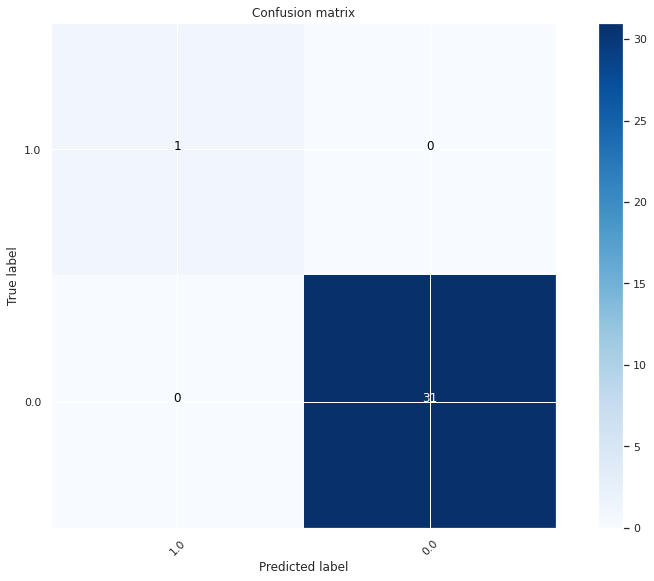

In [324]:
y_true = prediction_rf.select("daily_death_index")
y_true = y_true.toPandas()

y_pred = prediction_rf.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)


np.set_printoptions(precision=1)
print (classification_report(y_true, y_pred))



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')


plt.show()


Evaluate the prediction accuracy

In [325]:
accuracy = prediction_rf.filter(prediction_rf.daily_death_index == prediction_rf.prediction).count() / float(prediction_rf.count())
print("Accuracy : ",accuracy)

Accuracy :  0.8591549295774648


**f1score**

In [326]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='weighted')


0.8193534142146609

**presision score**

In [328]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average='weighted')


0.8071428571428572

**recall**

In [329]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average='weighted')

0.8591549295774648

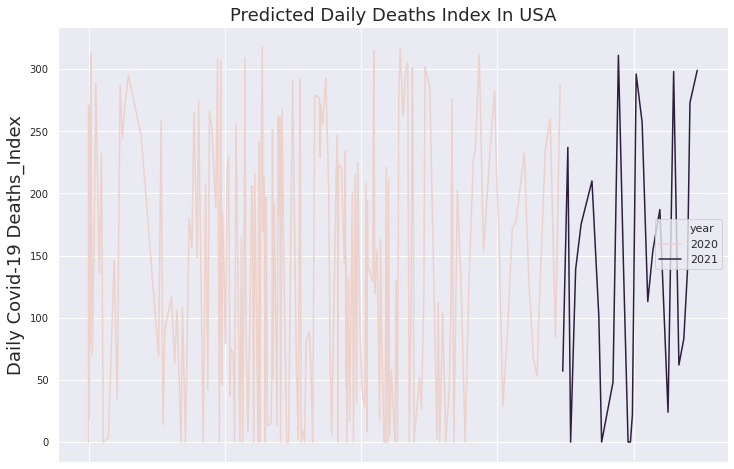

<Figure size 2880x1440 with 0 Axes>

In [322]:
import seaborn as sns
from matplotlib import pyplot as plt

predicted_daily_deaths = sns.lineplot(x="deaths", y="prediction", data=prediction_rf.toPandas(), hue='year')

sns.set(rc={'figure.figsize':(12,8)})

predicted_daily_deaths.set(xticklabels=[])
#daily_cases.set(xlabel=None)

plt.ylabel("Daily Covid-19 Deaths_Index", fontsize = 18)
plt.xlabel("", fontsize = 18)
plt.title("Predicted Daily Deaths Index In USA", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.figure(figsize=(40,20))
plt.show()

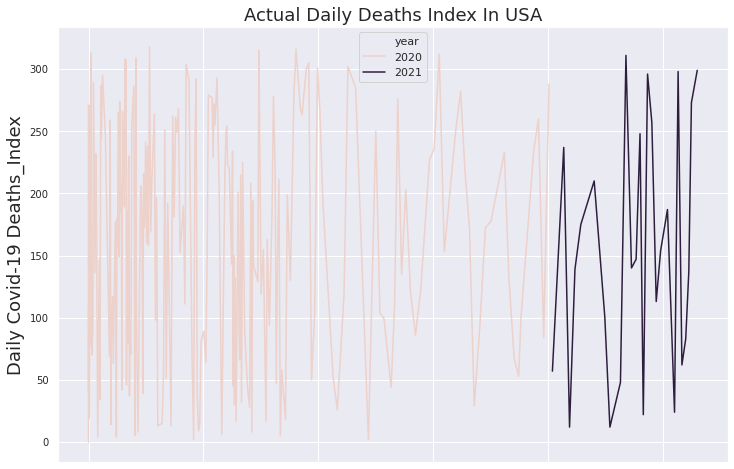

<Figure size 2880x1440 with 0 Axes>

In [323]:
import seaborn as sns
from matplotlib import pyplot as plt

actual_daily_deaths = sns.lineplot(x="cases", y="daily_death_index", data=prediction_rf.toPandas(), hue="year")

sns.set(rc={'figure.figsize':(12,8)})

actual_daily_deaths.set(xticklabels=[])

#daily_cases.set(xlabel=None)

plt.ylabel("Daily Covid-19 Deaths_Index", fontsize = 18)
plt.xlabel("", fontsize = 18)
plt.title("Actual Daily Deaths Index In USA", fontsize = 18)
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.figure(figsize=(40,20))
plt.show()

In [ ]:
#Building deep learning model using **Keras**

#Building a Sequential Keras model and compiling the model with a training configuration. Afterwards, we train the model on the training data and evaluate it on the test set.

In [ ]:
#Let's determine the number of classes and the number of inputs from our data for our model.

In [74]:
# Number of Classes
#n_of_classes = train_set.select("daily_death_index").distinct().count()

# Number of Inputs or Input Dimensions
#n_input_dim = len(train_set.select("features").first()[0])

In [110]:
#import numpy as np
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras import optimizers, regularizers
#from tensorflow.keras.optimizers import Adam



In [293]:
# Set up Deep Learning Model / Architecture
#model = Sequential()
#model.add(Dense(512, input_shape=(n_input_dim,), activation='relu'))
#model.add(Dropout(rate=0.3))
#model.add(Dense(n_of_classes, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [294]:
#model.summary()

In [123]:
#model_kr = model.fit(train_set)
#model_prkr = model_kr.evaluate(test_set)
#model_prkr.show()

